In [1]:
import pandas as pd

# read dataset from CSV file an put it into a data frame
songs = pd.read_csv('../../data/spotify.csv')

# output the first 10 songs to have a look on the data
songs[:10]

,title,artist,top genre,year released,added,bpm,nrgy,dnce,dB,live,val,dur,acous,spch,pop,top year,artist type
0,STARSTRUKK (feat. Katy Perry),3OH!3,dance pop,2009.0,2022‑02‑17,140.0,81.0,61.0,-6.0,23.0,23.0,203.0,0.0,6.0,70.0,2010.0,Duo
1,My First Kiss (feat. Ke$ha),3OH!3,dance pop,2010.0,2022‑02‑17,138.0,89.0,68.0,-4.0,36.0,83.0,192.0,1.0,8.0,68.0,2010.0,Duo
2,I Need A Dollar,Aloe Blacc,pop soul,2010.0,2022‑02‑17,95.0,48.0,84.0,-7.0,9.0,96.0,243.0,20.0,3.0,72.0,2010.0,Solo
3,Airplanes (feat. Hayley Williams of Paramore),B.o.B,atl hip hop,2010.0,2022‑02‑17,93.0,87.0,66.0,-4.0,4.0,38.0,180.0,11.0,12.0,80.0,2010.0,Solo
4,Nothin' on You (feat. Bruno Mars),B.o.B,atl hip hop,2010.0,2022‑02‑17,104.0,85.0,69.0,-6.0,9.0,74.0,268.0,39.0,5.0,79.0,2010.0,Solo
5,Magic (feat. Rivers Cuomo),B.o.B,atl hip hop,2010.0,2022‑02‑17,82.0,93.0,55.0,-4.0,35.0,79.0,196.0,1.0,34.0,71.0,2010.0,Solo
6,The Time (Dirty Bit),Black Eyed Peas,dance pop,2010.0,2022‑02‑17,128.0,81.0,82.0,-8.0,60.0,44.0,308.0,7.0,7.0,75.0,2010.0,Band/Group
7,Imma Be,Black Eyed Peas,dance pop,2009.0,2022‑02‑17,92.0,52.0,60.0,-7.0,31.0,41.0,258.0,18.0,37.0,71.0,2010.0,Band/Group
8,Talking to the Moon,Bruno Mars,dance pop,2010.0,2022‑02‑17,146.0,59.0,50.0,-5.0,11.0,8.0,218.0,51.0,3.0,87.0,2010.0,Solo
9,Just the Way You Are,Bruno Mars,dance pop,2010.0,2022‑02‑17,109.0,84.0,64.0,-5.0,6.0,42.0,221.0,1.0,4.0,86.0,2010.0,Solo


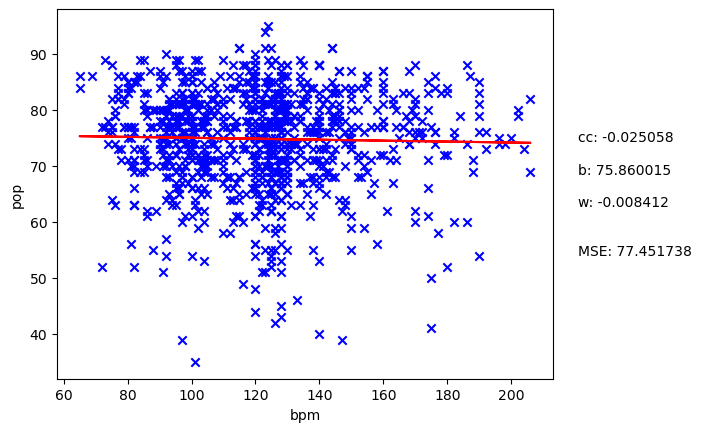

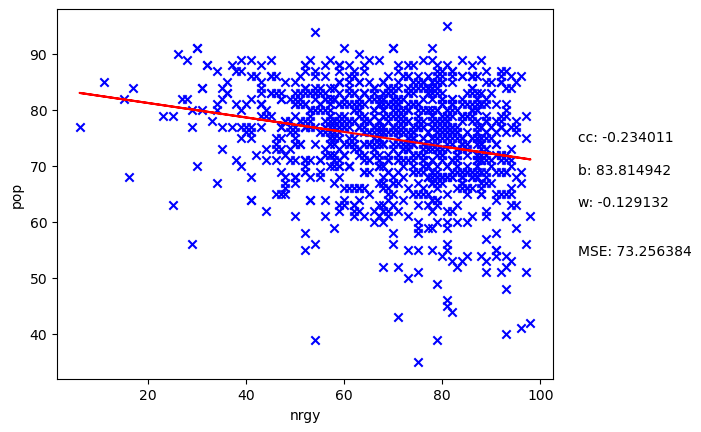

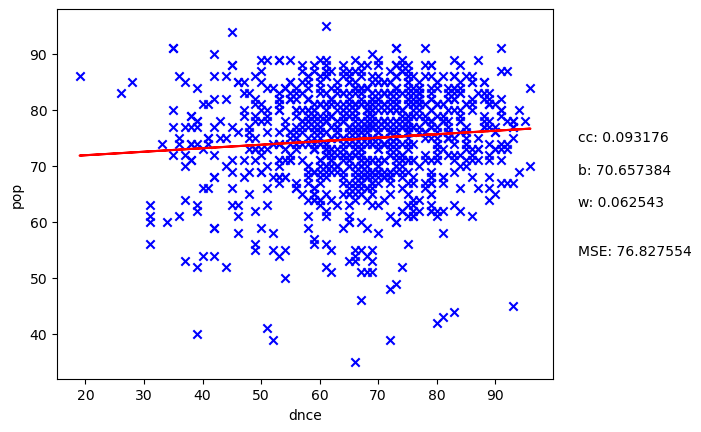

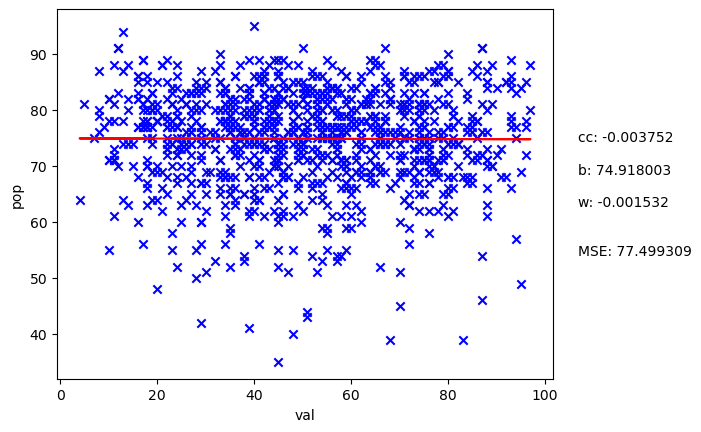

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# read csv file into a data frame
songs = pd.read_csv('../../data/spotify.csv')

# perform data cleansing by eliminating songs that have missing values (NAN) for one of the features.
songs = songs.dropna()

# create scatter plots for BPM, NRGY, DNCE, VAL and POP
xls = ['bpm', 'nrgy', 'dnce', 'val']
yl = 'pop'


# Try diffrent input features to see whether there are any obvious relationships between any of them and the target feature pop
for xl in xls:
    lr = linear_model.LinearRegression()
    X = songs[xl].values
    X = X.reshape(X.size, 1)
    y = songs[yl].values
    lr.fit(X, y)

    # correlation coefficient and regression coefficients
    cc = np.corrcoef(songs[xl], songs[yl])[0,1]
    b = lr.intercept_
    w = lr.coef_[0]
    
    # compute mean squared error
    mse = sum((lr.predict(X) - y)**2) / len(y)
    

    # plot the data and the regression line
    additional_information = 'cc: %f \n\nb: %f \n\nw: %f \n\n\nMSE: %f' % (cc, b, w, mse) 
    plt.text(1.05, 0.5, additional_information, transform=plt.gca().transAxes, va='center')
    plt.scatter(songs[xl], songs[yl], marker='x', color='b')
    plt.plot(X, lr.predict(X), color='r')
    plt.xlabel(xl)
    plt.ylabel(yl)
    plt.show()
    
 

### Attempt encoding an additional nominal feature and use all five input features together to predict the target feature 'pop' to see if it is a good idea.

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model
from sklearn import model_selection

# read csv file into a data frame
songs = pd.read_csv('../../data/spotify.csv')

# perform data cleansing by eliminating songs that have missing values (NAN) for one of the features.
songs = songs.dropna()

# extract first four numerical features
songs_numerical = songs[['bpm', 'nrgy', 'dnce', 'val']]

# one hot encode for nominal input feature "genre"
songs_nominal = pd.get_dummies(songs['top genre'], 'genre')

# concatenate the two data frames
songs_combined = pd.concat([songs_numerical, songs_nominal], axis=1)


### Find out how many columns there are now in the new Dataframe after encoding the nominal input feature 'top genre'

In [4]:
# Check how many distinct values the column 'top genre' has
distinct_count = songs['top genre'].nunique()
print('Number of distinct values in the column "top genre": %i' % distinct_count)

# Find the total number of columns in the dataframe songs_combined
columns_total_number = 4 + distinct_count
print('Total number of columns in the new df "songs_combined" should be equal to 4 + %i: %i' % (distinct_count, columns_total_number))

# Print the shape of the new df containing 4 features + encoded feature
print('Shape of the new df "songs_combined": %s' % str(songs_combined.shape))

# Output the first ten songs, where every row should now have these values: bpm, nrgy, dnce, val, 1X 1, and 131X 0 
songs_combined[:10]


Number of distinct values in the column "top genre": 132
Total number of columns in the new df "songs_combined" should be equal to 4 + 132: 136
Shape of the new df "songs_combined": (1000, 136)


,bpm,nrgy,dnce,val,genre_acoustic pop,genre_adult standards,genre_afro dancehall,genre_afrofuturism,genre_afroswing,genre_alt z,...,genre_pop soul,genre_rap,genre_reggae fusion,genre_romanian house,genre_san diego rap,genre_social media pop,genre_talent show,genre_tropical house,genre_uk drill,genre_uk hip hop
0,140.0,81.0,61.0,23.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,138.0,89.0,68.0,83.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,95.0,48.0,84.0,96.0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0
3,93.0,87.0,66.0,38.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,104.0,85.0,69.0,74.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,82.0,93.0,55.0,79.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6,128.0,81.0,82.0,44.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7,92.0,52.0,60.0,41.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8,146.0,59.0,50.0,8.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9,109.0,84.0,64.0,42.0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### Regression:

In [6]:
# determine data matrix and target vector
X = songs_combined.values
y = songs['pop']

# split into training and test data
X_train, X_test, y_train, y_test = model_selection.train_test_split(X, y, test_size=0.2, random_state=0)

# fit linear regression model
lr = linear_model.LinearRegression()
lr.fit(X_train, y_train)

# print coefficients 
print('Intercept: %f \n' % lr.intercept_)
print('coefficients:\n-------------') 
for i in range(0, 10):
    print('%s : %f' % (songs_combined.columns[i], lr.coef_[i]))
print('... \n..\n') 
    
# compute and print mean squared error
mse = sum((y_train - lr.predict(X_train))**2) / y_train.size
print('MSE on training data: %f' % mse)
    
# compute and print mean squared error
mse = sum((y_test - lr.predict(X_test))**2) / y_test.size
print('MSE on test data: %f' % mse)

Intercept: -607324528240.714111 

coefficients:
-------------
bpm : 0.007153
nrgy : -0.142078
dnce : 0.036783
val : 0.038878
genre_acoustic pop : 607324528310.993896
genre_adult standards : 9191074792901.263672
genre_afro dancehall : 607324528304.747803
genre_afrofuturism : 607324528307.840820
genre_afroswing : 607324528304.823120
genre_alt z : 607324528314.962280
... 
..

MSE on training data: 53.223039
MSE on test data: 396838411866912245940224.000000


=> While the model performs better on the training data than the previously considered single-feature models, it clearly overfits, resulting in poor performance on the test data. This is an effect of adding the large number of additional genre-related features.